In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime



In [2]:
Scaled_df = pd.read_excel('/Users/markclampitt/Documents/Springboard/Capstone2/Data\Scaled_df.xlsx')
Scaled_df.head()

,Previous Away HI Pass yrds,Previous Away HI Rush yrds,Previous Away HI REC yrds,Previous Away Season T Wins,Previous Away Season Losses,Previous Away Conf Losses,Previous Away Conf Wins,Previous Away 1st Downs,Previous Away 3rd Down Conversions,Previous Away 3rd Down Conversions Attempts,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,0.939990,-0.782569,0.117323,-0.572982,-0.803459,-0.802036,-0.655167,-0.707413,-0.124248,-0.440238,...,0,0,0,0,0,0,0,0,0,1
1,-1.470013,-0.636199,-1.203281,-0.572982,1.462141,1.465790,0.425793,-0.707413,-1.392509,-0.440238,...,0,0,0,0,0,0,0,0,0,1
2,0.331962,0.681130,-0.405935,0.260077,1.009021,1.012225,1.506753,0.501444,-0.969755,-0.819435,...,0,0,0,0,0,0,0,0,0,1
3,0.011365,0.660220,0.216991,1.093136,-0.803459,-0.802036,2.587713,1.710301,0.721259,-1.198632,...,0,0,0,0,0,0,0,0,1,0
4,0.088751,-0.636199,-0.580355,-0.572982,0.102781,0.105094,0.425793,-0.016638,1.144012,0.697352,...,0,0,0,0,0,0,0,0,1,0


In [8]:
new_df = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\new_df.xlsx')
new_df.head()

,Previous Away HI Pass yrds,Previous Away HI Rush yrds,Previous Away HI REC yrds,Previous Away Season T Wins,Previous Away Season Losses,Previous Away Conf Losses,Previous Away Conf Wins,Previous Away 1st Downs,Previous Away 3rd Down Conversions,Previous Away 3rd Down Conversions Attempts,...,H_Georgia,H_Kentucky,H_LSU,H_Mississippi State,H_Missouri,H_Ole Miss,H_South Carolina,H_Tennessee,H_Texas A&M,H_Vanderbilt
0,65,28,22,4,1,1,1,9,3,12,...,0,0,0,0,0,1,0,0,0,0
1,151,48,69,4,0,0,2,28,6,14,...,0,0,0,0,0,0,0,0,0,0
2,280,51,85,3,1,1,1,15,5,13,...,0,1,0,0,0,0,0,0,0,0
3,240,78,61,3,0,0,1,19,7,13,...,0,0,0,0,0,0,0,0,1,0
4,79,64,33,0,8,8,0,13,3,14,...,0,0,0,0,0,0,0,0,0,0


In [9]:
new_df.shape

(820, 261)

In [13]:
H_Ole_Miss= new_df[new_df['H_Ole Miss'] == 1]

In [14]:
H_Ole_Miss

,Previous Away HI Pass yrds,Previous Away HI Rush yrds,Previous Away HI REC yrds,Previous Away Season T Wins,Previous Away Season Losses,Previous Away Conf Losses,Previous Away Conf Wins,Previous Away 1st Downs,Previous Away 3rd Down Conversions,Previous Away 3rd Down Conversions Attempts,...,H_Georgia,H_Kentucky,H_LSU,H_Mississippi State,H_Missouri,H_Ole Miss,H_South Carolina,H_Tennessee,H_Texas A&M,H_Vanderbilt
0,65,28,22,4,1,1,1,9,3,12,...,0,0,0,0,0,1,0,0,0,0
35,336,19,115,2,5,5,2,20,7,13,...,0,0,0,0,0,1,0,0,0,0
42,234,126,101,2,3,3,2,17,3,10,...,0,0,0,0,0,1,0,0,0,0
56,272,111,74,2,2,2,2,27,7,16,...,0,0,0,0,0,1,0,0,0,0
69,249,98,134,1,0,0,1,22,9,14,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,140,42,52,0,2,2,0,12,4,12,...,0,0,0,0,0,1,0,0,0,0
777,171,69,40,2,0,0,1,19,4,11,...,0,0,0,0,0,1,0,0,0,0
795,229,56,98,8,1,1,5,16,5,15,...,0,0,0,0,0,1,0,0,0,0
800,116,190,43,2,5,5,0,16,5,17,...,0,0,0,0,0,1,0,0,0,0


In [15]:
new_df.shape

(820, 261)

In [16]:
new_df = new_df[new_df['H_Ole Miss'] != 1]

In [17]:
new_df.shape

(756, 261)

In [18]:
len(new_df) * .7, len(new_df) * .3

(529.1999999999999, 226.79999999999998)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='Home Score_x_x'), 
                                                    new_df['Home Score_x_x'], test_size=0.3, 
                                                    random_state=47)

In [21]:
X_train.shape, X_test.shape

((529, 260), (227, 260))

In [22]:
y_train.shape, y_test.shape

((529,), (227,))

In [23]:
names_list = ['Date']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((529, 259), (227, 259))

In [25]:
pd.set_option('Max_rows',None)
pd.set_option('Max_columns',None)

In [26]:
X_train.dtypes

Previous Away HI Pass yrds                                int64
Previous Away HI Rush yrds                                int64
Previous Away HI REC yrds                                 int64
Previous Away Season T Wins                               int64
Previous Away Season Losses                               int64
Previous Away Conf Losses                                 int64
Previous Away Conf Wins                                   int64
Previous Away 1st Downs                                   int64
Previous Away 3rd Down Conversions                        int64
Previous Away 3rd Down Conversions Attempts               int64
Previous Away 3rd Down Conversions %                    float64
Previous Away Completions                                 int64
Previous Away Completion Attempts                         int64
Previous Away Completion %                              float64
Previous Away Total Yards                                 int64
Previous Away Passing                   

In [27]:
X_test.dtypes

Previous Away HI Pass yrds                                int64
Previous Away HI Rush yrds                                int64
Previous Away HI REC yrds                                 int64
Previous Away Season T Wins                               int64
Previous Away Season Losses                               int64
Previous Away Conf Losses                                 int64
Previous Away Conf Wins                                   int64
Previous Away 1st Downs                                   int64
Previous Away 3rd Down Conversions                        int64
Previous Away 3rd Down Conversions Attempts               int64
Previous Away 3rd Down Conversions %                    float64
Previous Away Completions                                 int64
Previous Away Completion Attempts                         int64
Previous Away Completion %                              float64
Previous Away Total Yards                                 int64
Previous Away Passing                   

In [28]:
train_mean = y_train.mean()
train_mean

26.79773156899811

In [29]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[26.79773157]])

In [30]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 -  sum_sq_res / sum_sq_tot
    return R2

In [31]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([26.79773157, 26.79773157, 26.79773157, 26.79773157, 26.79773157])

In [32]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([26.79773157, 26.79773157, 26.79773157, 26.79773157, 26.79773157])

In [33]:
r_squared(y_train, y_tr_pred)

0.0

In [34]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.004446742408482418

In [35]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(ypred - y)
    mae = np.mean(abs_error)
    return mae

In [36]:
mae(y_train, y_tr_pred)

11.199995711850669

In [37]:
mae(y_test, y_te_pred)

11.277583005088148

In [38]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [39]:
mse(y_train, y_tr_pred)

183.0876319052607

In [40]:
mse(y_test, y_te_pred)

198.72178324925756

In [41]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([13.53098784, 14.0968714 ])

In [42]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.004446742408482418)

In [43]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(11.19999571185066, 11.277583005088148)

In [44]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(183.0876319052605, 198.72178324925767)

In [45]:
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, 0.0)

In [46]:
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.004446742408482418, -1.57443617383966e+31)

In [47]:
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

<ipython-input-30-4661c1ed3f49>:13: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 -  sum_sq_res / sum_sq_tot


(0.0, -inf)

In [48]:
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-0.004446742408482418, -1.57443617383966e+31)

In [49]:
X_defaults_median = X_train.median()
X_defaults_median

Previous Away HI Pass yrds                               192.000000
Previous Away HI Rush yrds                                79.000000
Previous Away HI REC yrds                                 73.000000
Previous Away Season T Wins                                4.000000
Previous Away Season Losses                                2.000000
Previous Away Conf Losses                                  2.000000
Previous Away Conf Wins                                    2.000000
Previous Away 1st Downs                                   19.000000
Previous Away 3rd Down Conversions                         5.000000
Previous Away 3rd Down Conversions Attempts               14.000000
Previous Away 3rd Down Conversions %                       0.363636
Previous Away Completions                                 17.000000
Previous Away Completion Attempts                         30.000000
Previous Away Completion %                                 0.575000
Previous Away Total Yards                       

In [50]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [52]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [53]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [54]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [55]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.6226044197716663, -6.170045657310916e+17)

In [56]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(6.781493115839641, 733314966.8606471)

In [57]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse


(69.09646307551738, 1.2206943623612563e+20)

In [58]:
X_defaults_mean = X_train.mean()
X_defaults_mean

Previous Away HI Pass yrds                               199.608696
Previous Away HI Rush yrds                                88.621928
Previous Away HI REC yrds                                 81.489603
Previous Away Season T Wins                                4.385633
Previous Away Season Losses                                2.848771
Previous Away Conf Losses                                  2.841210
Previous Away Conf Wins                                    2.243856
Previous Away 1st Downs                                   19.366730
Previous Away 3rd Down Conversions                         5.315690
Previous Away 3rd Down Conversions Attempts               14.189036
Previous Away 3rd Down Conversions %                       0.372754
Previous Away Completions                                 17.519849
Previous Away Completion Attempts                         30.625709
Previous Away Completion %                                 0.573212
Previous Away Total Yards                       

In [59]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [60]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)


In [61]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [62]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [63]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.6226044197716663, -6.170045657310916e+17)

In [64]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.781493115839641, 733314966.8606471)

In [65]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(69.09646307551738, 1.2206943623612563e+20)

In [66]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [67]:
type(pipe)

sklearn.pipeline.Pipeline

In [68]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [70]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)


In [71]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.6226044197716663, -6.170045657310916e+17)

In [72]:
median_r2

(0.6226044197716663, -6.170045657310916e+17)

In [73]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.781493115839641, 733314966.8606471)

In [74]:
median_mae

(6.781493115839641, 733314966.8606471)

In [75]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(69.09646307551738, 1.2206943623612563e+20)

In [76]:
median_mse

(69.09646307551738, 1.2206943623612563e+20)

In [77]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [78]:
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7ff4f6529790>)),
                ('linearregression', LinearRegression())])

In [79]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [80]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.13813359533467184, 0.16902616923521252)

In [81]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(10.261799268397363, 10.080314204608747)

In [82]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

In [83]:
pipe15.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7ff4f6529790>)),
                ('linearregression', LinearRegression())])

In [84]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [85]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.14816300309458197, 0.14074538653045487)

In [86]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(10.212025121591724, 10.271329106024393)

In [87]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [88]:
cv_scores = cv_results['test_score']
cv_scores

array([0.1007741 , 0.08999191, 0.05178495, 0.08590905, 0.11026275])

In [89]:
np.mean(cv_scores), np.std(cv_scores)

(0.08774455247638882, 0.01989146154461178)

In [90]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.05, 0.13])

In [91]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [92]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [93]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [94]:
lr_grid_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff4f6529790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [95]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [96]:
lr_grid_cv.best_params_

{'selectkbest__k': 47}

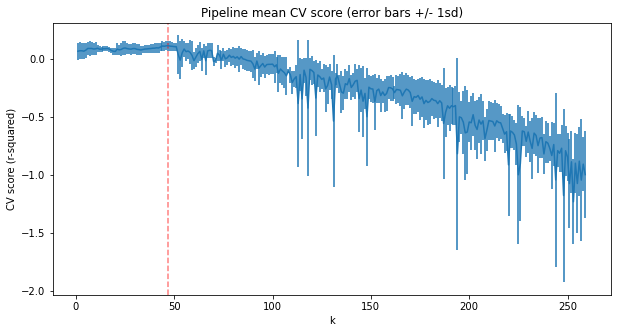

In [97]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [98]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [99]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Previous Away Conf Losses                     12.294362
Rolling 3 Past Home Score                      4.920059
Rolling 5 Past H&A Total Yards_Home_Team       3.088617
Rolling 3 Past H&A Conf T Losses_Away_Team     2.495567
Rolling 3 Past H&A Conf T Wins_Home_Team       2.419015
Rolling 5 Past Home Total Yards                2.136897
Previous H&A Q1 Score_Home_Team                1.880848
Previous H&A Spread_Away_Team                  1.702404
Previous H&A Season T Wins_Home_Team           1.660833
Previous H&A Conf Losses_Home_Team             1.457947
Previous H&A Q3 Score_Home_Team                1.428359
Previous Home 1st Downs                        1.321489
Previous Home Total Yards                      1.222959
A_Ranking Bin_Group                            1.041510
Previous H&A 1st Downs_Home_Team               0.898184
Previous Home HI Pass yrds                     0.835140
Previous Home Ranking                          0.779276
Previous H&A Completion %_Home_Team            0

In [100]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [101]:
rf_default_cv_results = cross_validate(RF_pipe, X_train,y_train, cv=5)

In [102]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.12092519, 0.20198448, 0.04669691, 0.18971248, 0.23075152])

In [103]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.15801411586394334, 0.06632649096454783)

In [104]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [105]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [106]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [107]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [108]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.15836539, 0.22090344, 0.05884723, 0.17773914, 0.24412169])

In [109]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.17199537918601257, 0.0642113294340732)

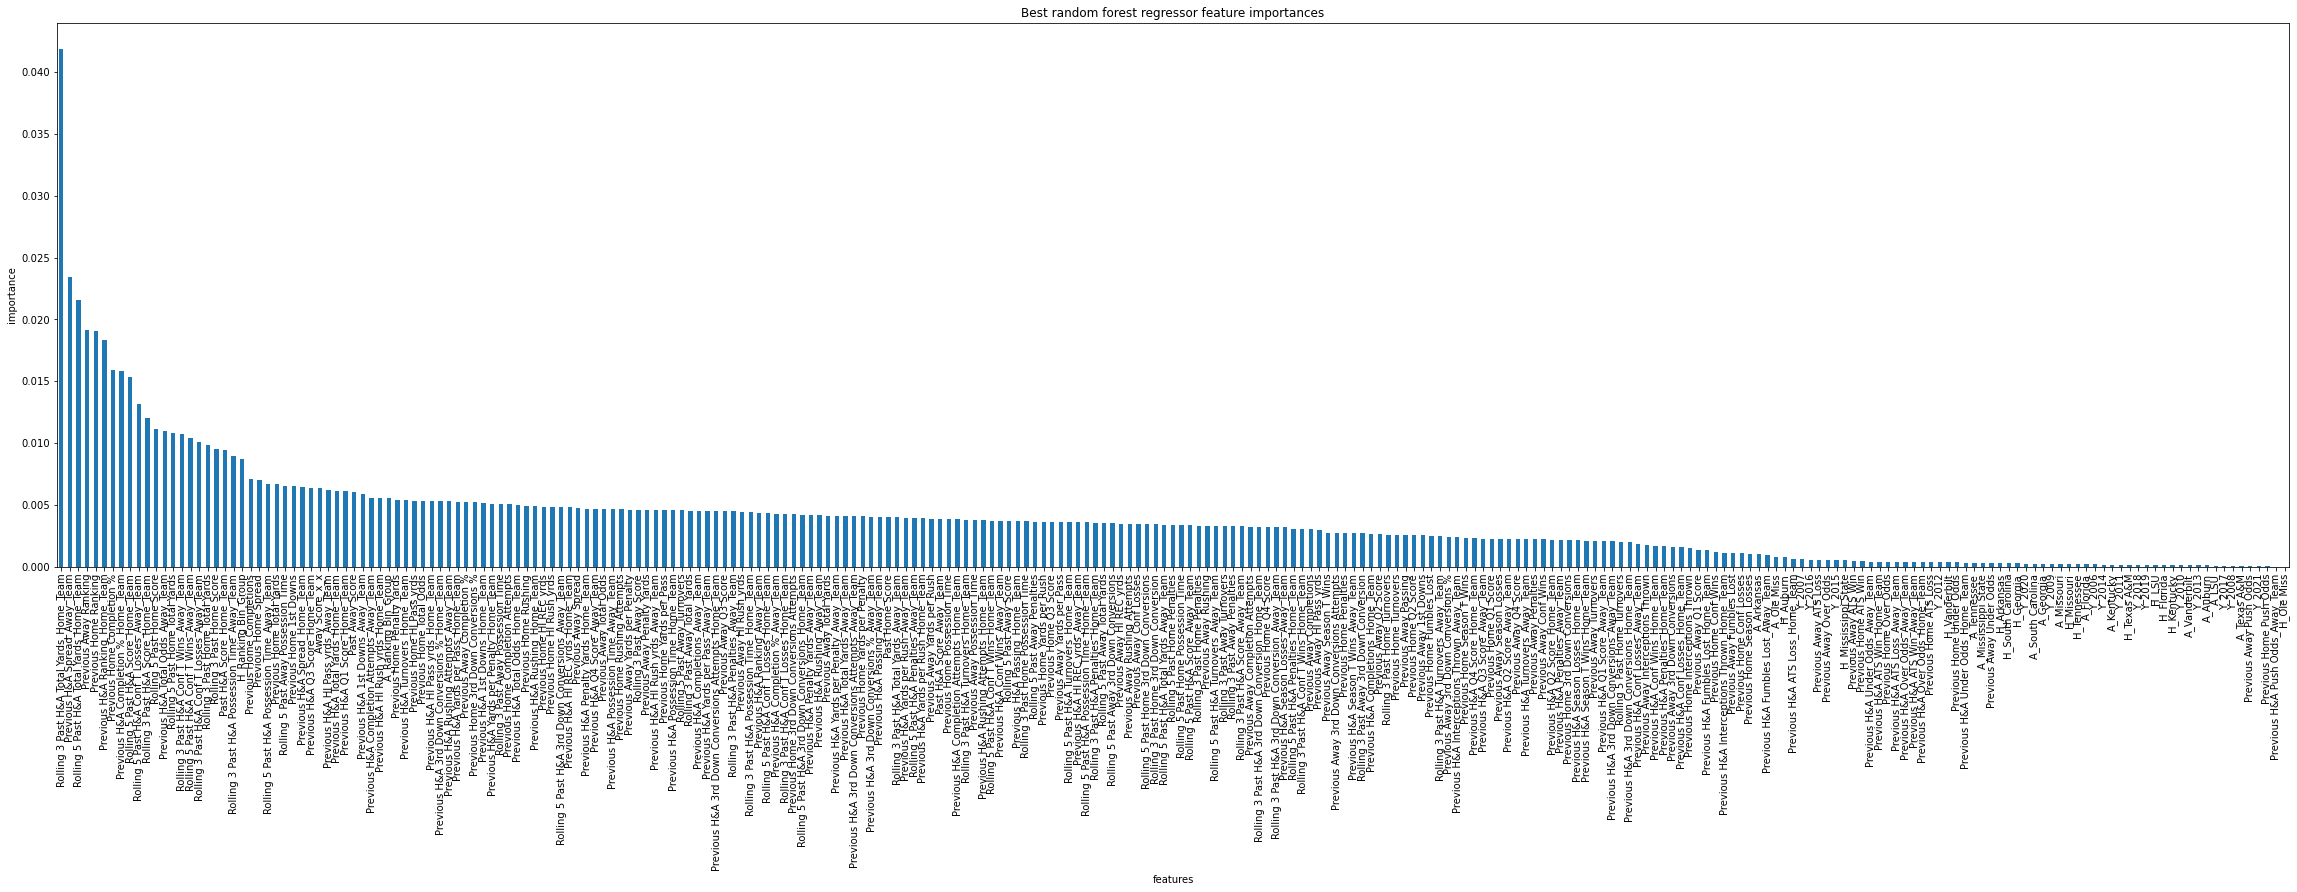

In [121]:
plt.subplots(figsize=(40, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [111]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [112]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(10.363256997611806, 0.5641667427031003)

In [113]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

9.929648897826771

In [114]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [115]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.905071320754717, 0.5734217722502046)

In [116]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.649277533039648

In [117]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

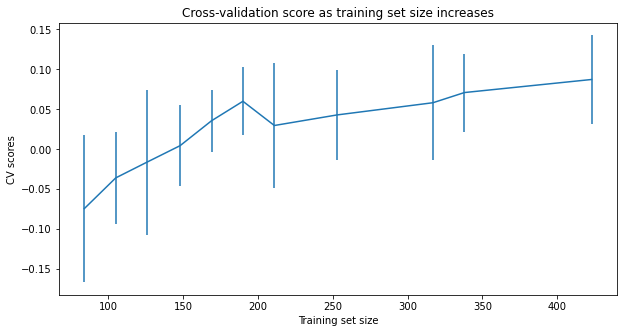

In [118]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');